# Mie Scattering Function

**Scott Prahl**

**Feb 2025**

Mie scattering describes the special case of the interaction of light passing through a non-absorbing medium with a single embedded spherical object.  The sphere itself can be non-absorbing, moderately absorbing, or perfectly absorbing.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import miepython as mie

## Goals for this notebook:

* show how to plot the phase function
* explain the units for the scattering phase function
* describe normalization of the phase function
* show a few examples from classic Mie texts


## Geometry

Specifically, the scattering function $p(\theta_i,\phi_i,\theta_o,\phi_o)$ describes the amount of light scattered by a particle for light incident at an angle $(\theta_i,\phi_i)$ and exiting the particle (in the far field) at an angle $(\theta_o,\phi_o)$.  For simplicity, the scattering function is often assumed to be rotationally symmetric (it is, obviously, for spherical scatterers) and that the angle that the light is scattered into only depends the $\theta=\theta_o-\theta_i$.  In this case, the scattering function can be written as $p(\theta)$.  Finally, the angle is often replaced by $\mu=\cos\theta$ and therefore the phase function becomes $p(\mu)$.

The figure below shows the basic idea.  An incoming monochromatic plane wave hits a sphere and produces *in the far field* two separate monochromatic waves — a slightly attenuated unscattered planar wave and an outgoing spherical wave.

Obviously. the scattered light will be cylindrically symmetric about the ray passing through the center of the sphere.

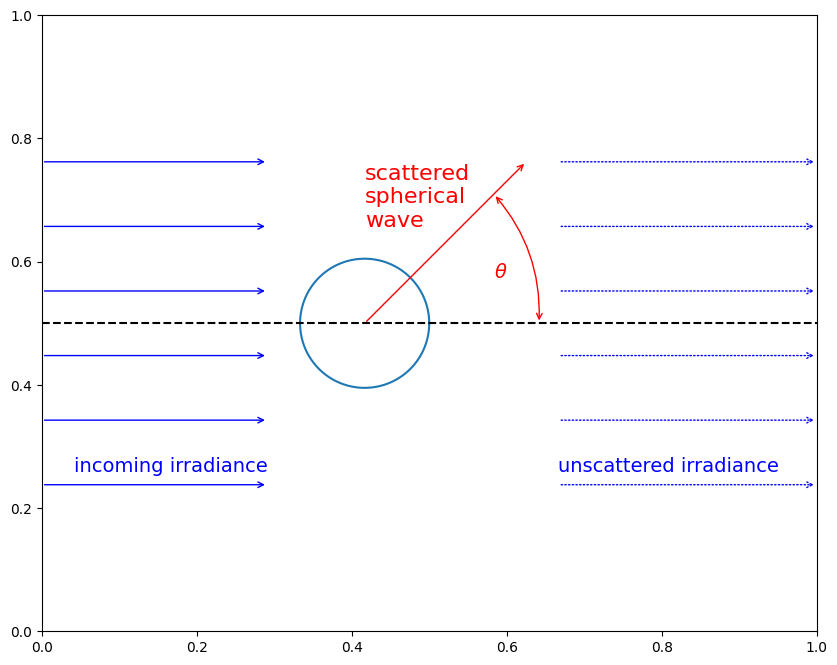

In [3]:
t = np.linspace(0, 2 * np.pi, 100)
xx = np.cos(t)
yy = np.sin(t)
fig, ax = plt.subplots(figsize=(10, 8))
plt.axes().set_aspect("equal")
plt.plot(xx, yy)
plt.plot([-5, 7], [0, 0], "--k")

plt.annotate("incoming irradiance", xy=(-4.5, -2.3), ha="left", color="blue", fontsize=14)
for i in range(6):
    y0 = i - 2.5
    plt.annotate(
        "",
        xy=(-1.5, y0),
        xytext=(-5, y0),
        arrowprops=dict(arrowstyle="->", color="blue"),
    )

plt.annotate("unscattered irradiance", xy=(3, -2.3), ha="left", color="blue", fontsize=14)
for i in range(6):
    y0 = i - 2.5
    plt.annotate(
        "",
        xy=(7, y0),
        xytext=(3, y0),
        arrowprops=dict(arrowstyle="->", color="blue", ls=":"),
    )

plt.annotate("scattered\nspherical\nwave", xy=(0, 1.5), ha="left", color="red", fontsize=16)
plt.annotate("", xy=(2.5, 2.5), xytext=(0, 0), arrowprops=dict(arrowstyle="->", color="red"))
plt.annotate(r"$\theta$", xy=(2, 0.7), color="red", fontsize=14)
plt.annotate(
    "",
    xy=(2, 2),
    xytext=(2.7, 0),
    arrowprops=dict(connectionstyle="arc3,rad=0.2", arrowstyle="<->", color="red"),
)

plt.xlim(-5, 7)
plt.ylim(-3, 3)
plt.axis("off")
plt.show()

## Scattered Wave

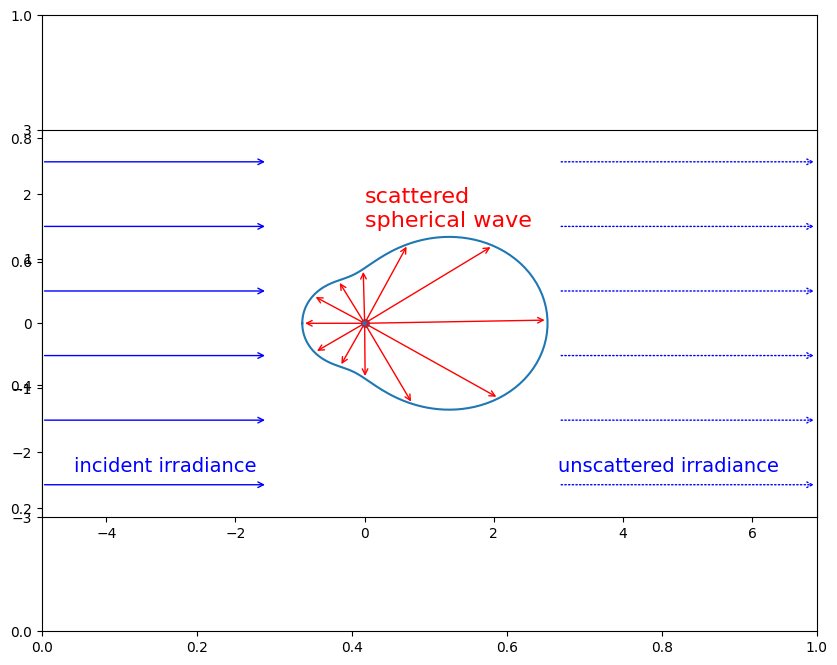

In [4]:
fig, ax = plt.subplots(figsize=(10, 8))
plt.axes().set_aspect("equal")
plt.scatter([0], [0], s=30)

m = 1.5
x = np.pi / 3
theta = np.linspace(-180, 180, 180)
theta_r = np.radians(theta)

mu = np.cos(theta_r)
scat = 15 * mie.i_unpolarized(m, x, mu)

plt.plot(scat * np.cos(theta / 180 * np.pi), scat * np.sin(theta / 180 * np.pi))
for i in range(12):
    ii = i * 15
    xx = scat[ii] * np.cos(theta_r[ii])
    yy = scat[ii] * np.sin(theta_r[ii])
    #    print(xx,yy)
    plt.annotate("", xy=(xx, yy), xytext=(0, 0), arrowprops=dict(arrowstyle="->", color="red"))


plt.annotate("incident irradiance", xy=(-4.5, -2.3), ha="left", color="blue", fontsize=14)
for i in range(6):
    y0 = i - 2.5
    plt.annotate(
        "",
        xy=(-1.5, y0),
        xytext=(-5, y0),
        arrowprops=dict(arrowstyle="->", color="blue"),
    )

plt.annotate("unscattered irradiance", xy=(3, -2.3), ha="left", color="blue", fontsize=14)
for i in range(6):
    y0 = i - 2.5
    plt.annotate(
        "",
        xy=(7, y0),
        xytext=(3, y0),
        arrowprops=dict(arrowstyle="->", color="blue", ls=":"),
    )

plt.annotate("scattered\nspherical wave", xy=(0, 1.5), ha="left", color="red", fontsize=16)

plt.xlim(-5, 7)
plt.ylim(-3, 3)
# plt.axis('off')
plt.show()

## Normalization of the scattered light

By default the scattering function is normalized so that the integral over all angles will be the single scattering albedo.

$$
a = \frac{Q_\mathrm{sca}}{Q_\mathrm{ext}} = \frac{Q_\mathrm{sca}}{Q_\mathrm{sca}+Q_\mathrm{abs}}
$$

So the scattering function or phase function has at least three reasonable normalizations that involve integrating over all $4\pi$ steradians.  Below $d\Omega=\sin\theta d\theta\,d\phi$ is a differential solid angle

$$
\int_{4\pi} p(\theta,\phi) \,d\Omega = a  \qquad\qquad \mbox{default normalization}
$$

See <https://miepython.readthedocs.io/en/latest/03a_normalization.html> for details about other normalization options.


## Examples

### Unpolarized Scattering Function

If unpolarized light hits the sphere, then there are no polarization effects to worry about.  It is pretty easy to generate a plot to show how scattering changes with angle.

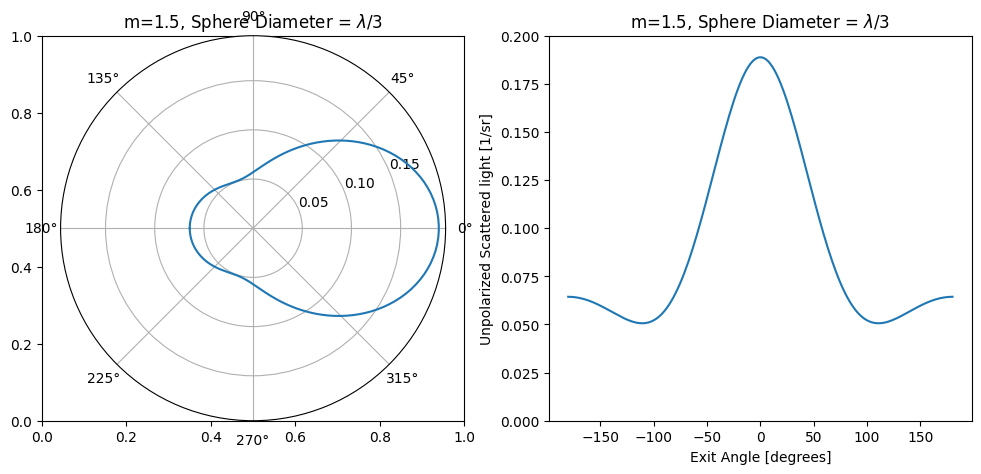

In [4]:
m = 1.5
x = np.pi / 3
theta = np.linspace(-180, 180, 180)
mu = np.cos(theta / 180 * np.pi)
scat = mie.i_unpolarized(m, x, mu)

fig, ax = plt.subplots(1, 2, figsize=(12, 5))
ax = plt.subplot(121, projection="polar")
ax.plot(theta / 180 * np.pi, scat)
ax.set_rticks([0.05, 0.1, 0.15])
ax.set_title(r"m=1.5, Sphere Diameter = $\lambda$/3")

plt.subplot(122)
plt.plot(theta, scat)
plt.xlabel("Exit Angle [degrees]")
plt.ylabel("Unpolarized Scattered light [1/sr]")
plt.title(r"m=1.5, Sphere Diameter = $\lambda$/3")
plt.ylim(0.00, 0.2)

plt.show()

A similar calculation but using `mie.intensities(m, d, lambda0, mu)`

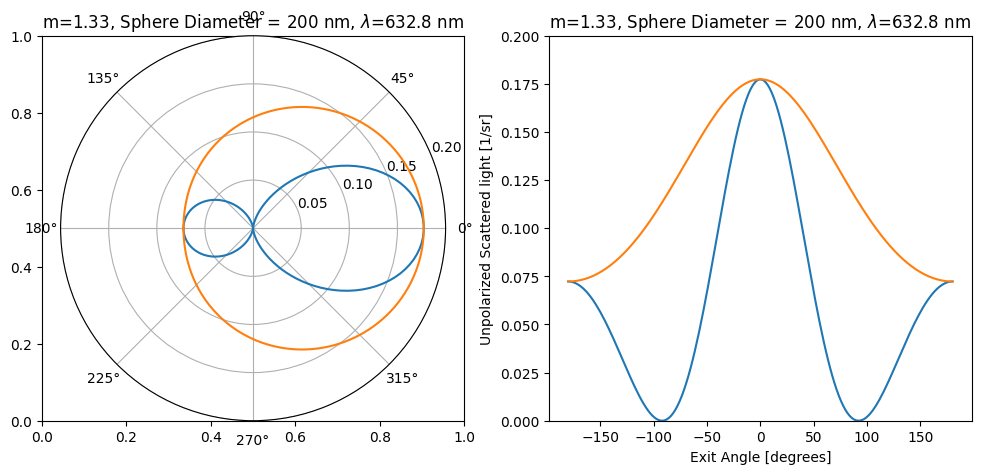

In [5]:
m = 1.33
lambda0 = 632.8  # nm
d = 200  # nm

theta = np.linspace(-180, 180, 180)
mu = np.cos(theta / 180 * np.pi)

Ipar, Iper = mie.intensities(m, d, lambda0, mu)

fig, ax = plt.subplots(1, 2, figsize=(12, 5))
ax = plt.subplot(121, projection="polar")
ax.plot(theta / 180 * np.pi, Ipar)
ax.plot(theta / 180 * np.pi, Iper)

ax.set_rticks([0.05, 0.1, 0.15, 0.20])
plt.title(r"m=%.2f, Sphere Diameter = %.0f nm, $\lambda$=%.1f nm" % (m, d, lambda0))

plt.subplot(122)
plt.plot(theta, Ipar)
plt.plot(theta, Iper)

plt.xlabel("Exit Angle [degrees]")
plt.ylabel("Unpolarized Scattered light [1/sr]")
plt.title(r"m=%.2f, Sphere Diameter = %.0f nm, $\lambda$=%.1f nm" % (m, d, lambda0))
plt.ylim(0.00, 0.2)

plt.show()

### Rayleigh Scattering

Classic Rayleigh scattering treats small particles with natural (unpolarized) light. Here the calculation is done using the Mie formulas, rather than Rayleigh's approximation.

The solid black line denotes the total scattered intensity. The red dashed line is light scattered that is polarized perpendicular to the plane of the graph and the blue dotted line is for light parallel to the plane of the graph. (Compare with van de Hulst, Figure 10)

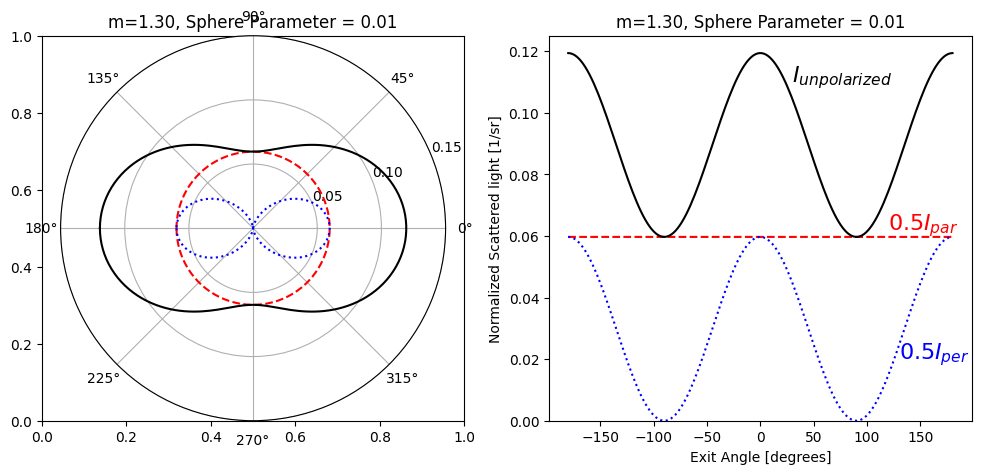

In [6]:
m = 1.3
x = 0.01
theta = np.linspace(-180, 180, 180)
mu = np.cos(theta / 180 * np.pi)
ipar = mie.i_par(m, x, mu) / 2
iper = mie.i_per(m, x, mu) / 2
iun = mie.i_unpolarized(m, x, mu)

fig, ax = plt.subplots(1, 2, figsize=(12, 5))
ax = plt.subplot(121, projection="polar")
ax.plot(theta / 180 * np.pi, iper, "r--")
ax.plot(theta / 180 * np.pi, ipar, "b:")
ax.plot(theta / 180 * np.pi, iun, "k")

ax.set_rticks([0.05, 0.1, 0.15])
plt.title("m=%.2f, Sphere Parameter = %.2f" % (m, x))

plt.subplot(122)
plt.plot(theta, iper, "r--")
plt.plot(theta, ipar, "b:")
plt.plot(theta, iun, "k")

plt.xlabel("Exit Angle [degrees]")
plt.ylabel("Normalized Scattered light [1/sr]")
plt.title("m=%.2f, Sphere Parameter = %.2f" % (m, x))
plt.ylim(0.00, 0.125)
plt.text(130, 0.02, r"$0.5I_{per}$", color="blue", fontsize=16)
plt.text(120, 0.062, r"$0.5I_{par}$", color="red", fontsize=16)
plt.text(30, 0.11, r"$I_{unpolarized}$", color="black", fontsize=16)


plt.show()

#### Verifying normalization numerically

Specifically, to ensure proper normalization, the integral of the scattering function over all solid angles must be unity

$$
a = \int_0^{2\pi}\int_0^\pi \, p(\theta,\phi)\,\sin\theta\,d\theta\,d\phi
$$

or with a change of variables $\mu=\cos\theta$ and using the symmetry to the integral in $\phi$

$$
a = 2\pi \int_{-1}^1 \, p(\mu)\,d\mu
$$

This integral can be done numerically by simply summing all the rectangles

$$
a = 2\pi \sum_{i=0}^N p(\mu_i)\,\Delta\mu_i
$$

and if all the rectanges have the same width

$$
a = 2\pi\Delta\mu \sum_{i=0}^N p(\mu_i)
$$

#### Case 2: m=1.5-1.5j, x=1

Aagin the total integral `total=` in the title should match the albedo `a=`.  

For this non-strongly peaked scattering function, the simple integration remains close to the expected value.

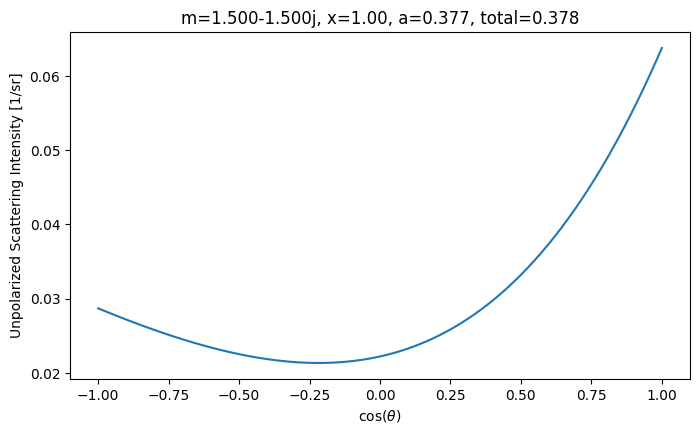

In [7]:
m = 1.5 - 1.5j
x = 1
mu = np.linspace(-1, 1, 501)
intensity = mie.i_unpolarized(m, x, mu)
qext, qsca, qback, g = mie.efficiencies_mx(m, x)
a = qsca / qext

# integrate over all angles
dmu = mu[1] - mu[0]
total = 2 * np.pi * dmu * np.sum(intensity)

plt.plot(mu, intensity)
plt.xlabel(r"$\cos(\theta)$")
plt.ylabel("Unpolarized Scattering Intensity [1/sr]")
plt.title("m=%.3f%+.3fj, x=%.2f, a=%.3f, total=%.3f" % (m.real, m.imag, x, a, total))
plt.show()

## Comparison to Wiscombe's Mie Program

Wiscombe normalizes as

$$
\int_{4\pi} p(\theta,\phi) \,d\Omega = \pi x^2  Q_{sca}
$$

where $p(\theta)$ is the scattered light.

Once corrected for differences in phase function normalization, Wiscombe's test cases match those from `miepython` exactly.

### Wiscombe's Test Case 14

In [8]:
"""
MIEV0 Test Case 14:  Refractive index:  real    1.500  imag  -1.000E+00,  Mie size parameter =     1.000
  Angle    Cosine           S-sub-1                     S-sub-2               Intensity  Deg of Polzn
   0.00  1.000000   5.84080E-01   1.90515E-01   5.84080E-01   1.90515E-01   3.77446E-01        0.0000
  30.00  0.866025   5.65702E-01   1.87200E-01   5.00161E-01   1.45611E-01   3.13213E-01       -0.1336
  60.00  0.500000   5.17525E-01   1.78443E-01   2.87964E-01   4.10540E-02   1.92141E-01       -0.5597
  90.00  0.000000   4.56340E-01   1.67167E-01   3.62285E-02  -6.18265E-02   1.20663E-01       -0.9574
"""

x = 1.0
m = 1.5 - 1.0j
mu = np.cos(np.linspace(0, 90, 4) * np.pi / 180)

qext, qsca, qback, g = mie.efficiencies_mx(m, x)
albedo = qsca / qext
unpolar = mie.i_unpolarized(m, x, mu)  # normalized to a
unpolar /= albedo  # normalized to 1

unpolar_miev = np.array([3.77446e-01, 3.13213e-01, 1.92141e-01, 1.20663e-01])
unpolar_miev /= np.pi * qsca * x**2  # normalized to 1
ratio = unpolar_miev / unpolar

print("MIEV0 Test Case 14:  m=1.500-1.000j,  Mie size parameter =     1.000")
print()
print("             %9.1f°%9.1f°%9.1f°%9.1f°" % (0, 30, 60, 90))
print(
    "MIEV0        %9.5f %9.5f %9.5f %9.5f"
    % (unpolar_miev[0], unpolar_miev[1], unpolar_miev[2], unpolar_miev[3])
)
print("miepython    %9.5f %9.5f %9.5f %9.5f" % (unpolar[0], unpolar[1], unpolar[2], unpolar[3]))
print("ratio        %9.5f %9.5f %9.5f %9.5f" % (ratio[0], ratio[1], ratio[2], ratio[3]))

MIEV0 Test Case 14:  m=1.500-1.000j,  Mie size parameter =     1.000

                   0.0°     30.0°     60.0°     90.0°
MIEV0          0.18109   0.15027   0.09218   0.05789
miepython      0.18109   0.15027   0.09218   0.05789
ratio          1.00000   1.00000   1.00000   1.00000


### Wiscombe's Test Case 10

In [9]:
"""
MIEV0 Test Case 10:  Refractive index:  real    1.330  imag  -1.000E-05,  Mie size parameter =   100.000
  Angle    Cosine           S-sub-1                     S-sub-2               Intensity  Deg of Polzn
   0.00  1.000000   5.25330E+03  -1.24319E+02   5.25330E+03  -1.24319E+02   2.76126E+07        0.0000
  30.00  0.866025  -5.53457E+01  -2.97188E+01  -8.46720E+01  -1.99947E+01   5.75775E+03        0.3146
  60.00  0.500000   1.71049E+01  -1.52010E+01   3.31076E+01  -2.70979E+00   8.13553E+02        0.3563
  90.00  0.000000  -3.65576E+00   8.76986E+00  -6.55051E+00  -4.67537E+00   7.75217E+01       -0.1645
"""

x = 100.0
m = 1.33 - 1e-5j
mu = np.cos(np.linspace(0, 90, 4) * np.pi / 180)

qext, qsca, qback, g = mie.efficiencies_mx(m, x)
albedo = qsca / qext
unpolar = mie.i_unpolarized(m, x, mu)  # normalized to a
unpolar /= albedo  # normalized to 1

unpolar_miev = np.array([2.76126e07, 5.75775e03, 8.13553e02, 7.75217e01])
unpolar_miev /= np.pi * qsca * x**2  # normalized to 1
ratio = unpolar_miev / unpolar

print("MIEV0 Test Case 10:  m=1.330-0.00001j,  Mie size parameter =     100.000")
print()
print("             %9.1f°%9.1f°%9.1f°%9.1f°" % (0, 30, 60, 90))
print(
    "MIEV0        %9.5f %9.5f %9.5f %9.5f"
    % (unpolar_miev[0], unpolar_miev[1], unpolar_miev[2], unpolar_miev[3])
)
print("miepython    %9.5f %9.5f %9.5f %9.5f" % (unpolar[0], unpolar[1], unpolar[2], unpolar[3]))
print("ratio        %9.5f %9.5f %9.5f %9.5f" % (ratio[0], ratio[1], ratio[2], ratio[3]))

MIEV0 Test Case 10:  m=1.330-0.00001j,  Mie size parameter =     100.000

                   0.0°     30.0°     60.0°     90.0°
MIEV0        419.22116   0.08742   0.01235   0.00118
miepython    419.22168   0.08742   0.01235   0.00118
ratio          1.00000   1.00000   1.00000   1.00000


### Wiscombe's Test Case 7

In [10]:
"""
MIEV0 Test Case  7:  Refractive index:  real    0.750  imag   0.000E+00,  Mie size parameter =    10.000
  Angle    Cosine           S-sub-1                     S-sub-2               Intensity  Deg of Polzn
   0.00  1.000000   5.58066E+01  -9.75810E+00   5.58066E+01  -9.75810E+00   3.20960E+03        0.0000
  30.00  0.866025  -7.67288E+00   1.08732E+01  -1.09292E+01   9.62967E+00   1.94639E+02        0.0901
  60.00  0.500000   3.58789E+00  -1.75618E+00   3.42741E+00   8.08269E-02   1.38554E+01       -0.1517
  90.00  0.000000  -1.78590E+00  -5.23283E-02  -5.14875E-01  -7.02729E-01   1.97556E+00       -0.6158
"""

x = 10.0
m = 0.75
mu = np.cos(np.linspace(0, 90, 4) * np.pi / 180)

qext, qsca, qback, g = mie.efficiencies_mx(m, x)
albedo = qsca / qext
unpolar = mie.i_unpolarized(m, x, mu)  # normalized to a
unpolar /= albedo  # normalized to 1

unpolar_miev = np.array([3.20960e03, 1.94639e02, 1.38554e01, 1.97556e00])
unpolar_miev /= np.pi * qsca * x**2  # normalized to 1
ratio = unpolar_miev / unpolar

print("MIEV0 Test Case 7:  m=0.75,  Mie size parameter =     10.000")
print()
print("             %9.1f°%9.1f°%9.1f°%9.1f°" % (0, 30, 60, 90))
print(
    "MIEV0        %9.5f %9.5f %9.5f %9.5f"
    % (unpolar_miev[0], unpolar_miev[1], unpolar_miev[2], unpolar_miev[3])
)
print("miepython    %9.5f %9.5f %9.5f %9.5f" % (unpolar[0], unpolar[1], unpolar[2], unpolar[3]))
print("ratio        %9.5f %9.5f %9.5f %9.5f" % (ratio[0], ratio[1], ratio[2], ratio[3]))

MIEV0 Test Case 7:  m=0.75,  Mie size parameter =     10.000

                   0.0°     30.0°     60.0°     90.0°
MIEV0          4.57673   0.27755   0.01976   0.00282
miepython      4.57673   0.27755   0.01976   0.00282
ratio          1.00000   1.00000   1.00000   1.00000


## Comparison to Bohren & Huffmans's Mie Program

Bohren & Huffman normalizes as

$$
\int_{4\pi} p(\theta,\phi) \,d\Omega = 4 \pi x^2  Q_{sca}
$$

### Bohren & Huffmans's Test Case 14

In [11]:
"""
BHMie Test Case 14, Refractive index = 1.5000-1.0000j, Size parameter = 1.0000

Angle  Cosine              S1                        S2             
0.00   1.0000  -8.38663e-01 -8.64763e-01  -8.38663e-01 -8.64763e-01 
0.52   0.8660  -8.19225e-01 -8.61719e-01  -7.21779e-01 -7.27856e-01
1.05   0.5000  -7.68157e-01 -8.53697e-01  -4.19454e-01 -3.72965e-01
1.57   0.0000  -7.03034e-01 -8.43425e-01  -4.44461e-02  6.94424e-02
"""

x = 1.0
m = 1.5 - 1j
mu = np.cos(np.linspace(0, 90, 4) * np.pi / 180)

qext, qsca, qback, g = mie.efficiencies_mx(m, x)
albedo = qsca / qext
unpolar = mie.i_unpolarized(m, x, mu)  # normalized to a
unpolar /= albedo  # normalized to 1

s1_bh = np.empty(4, dtype=complex)
s1_bh[0] = -8.38663e-01 - 8.64763e-01 * 1j
s1_bh[1] = -8.19225e-01 - 8.61719e-01 * 1j
s1_bh[2] = -7.68157e-01 - 8.53697e-01 * 1j
s1_bh[3] = -7.03034e-01 - 8.43425e-01 * 1j

s2_bh = np.empty(4, dtype=complex)
s2_bh[0] = -8.38663e-01 - 8.64763e-01 * 1j
s2_bh[1] = -7.21779e-01 - 7.27856e-01 * 1j
s2_bh[2] = -4.19454e-01 - 3.72965e-01 * 1j
s2_bh[3] = -4.44461e-02 + 6.94424e-02 * 1j

# BHMie seems to normalize their intensities to 4 * pi * x**2 * Qsca
unpolar_bh = (abs(s1_bh) ** 2 + abs(s2_bh) ** 2) / 2
unpolar_bh /= np.pi * qsca * 4 * x**2  # normalized to 1
ratio = unpolar_bh / unpolar

print("BHMie Test Case 14:  m=1.5000-1.0000j, Size parameter = 1.0000")
print()
print("             %9.1f°%9.1f°%9.1f°%9.1f°" % (0, 30, 60, 90))
print("BHMIE        %9.5f %9.5f %9.5f %9.5f" % (unpolar_bh[0], unpolar_bh[1], unpolar_bh[2], unpolar_bh[3]))
print("miepython    %9.5f %9.5f %9.5f %9.5f" % (unpolar[0], unpolar[1], unpolar[2], unpolar[3]))
print("ratio        %9.5f %9.5f %9.5f %9.5f" % (ratio[0], ratio[1], ratio[2], ratio[3]))
print()
print("Note that this test is identical to MIEV0 Test Case 14 above.")
print()
print("Wiscombe's code is much more robust than Bohren's so I attribute errors all to Bohren")

BHMie Test Case 14:  m=1.5000-1.0000j, Size parameter = 1.0000

                   0.0°     30.0°     60.0°     90.0°
BHMIE          0.17406   0.14780   0.09799   0.07271
miepython      0.18109   0.15027   0.09218   0.05789
ratio          0.96118   0.98353   1.06296   1.25600

Note that this test is identical to MIEV0 Test Case 14 above.

Wiscombe's code is much more robust than Bohren's so I attribute errors all to Bohren


### Bohren & Huffman, water droplets

Tiny water droplet (0.26 microns) in clouds has pretty strong forward scattering!  A graph of this is figure 4.9 in Bohren and Huffman's *Absorption and Scattering of Light by Small Particles*.  

A bizarre scaling factor of $16\pi$ is needed to make the `miepython` results match those in the figure 4.9.  

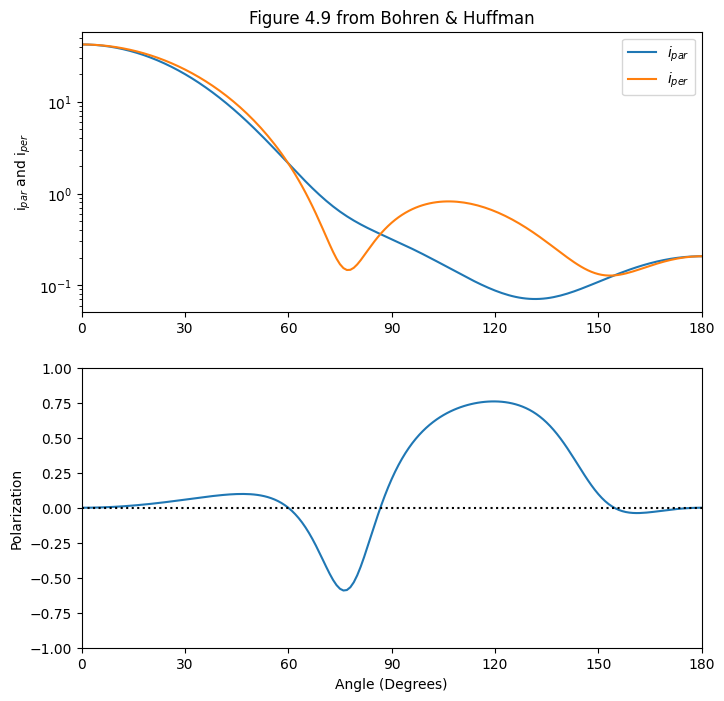

In [12]:
x = 3
m = 1.33 - 1e-8j

theta = np.linspace(0, 180, 181)
mu = np.cos(theta * np.pi / 180)

scaling_factor = 16 * np.pi
iper = scaling_factor * mie.i_per(m, x, mu)
ipar = scaling_factor * mie.i_par(m, x, mu)

P = (iper - ipar) / (iper + ipar)

plt.subplots(2, 1, figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.semilogy(theta, ipar, label="$i_{par}$")
plt.semilogy(theta, iper, label="$i_{per}$")
plt.xlim(0, 180)
plt.xticks(range(0, 181, 30))
plt.ylabel("i$_{par}$ and i$_{per}$")
plt.legend()
plt.title("Figure 4.9 from Bohren & Huffman")
plt.subplot(2, 1, 2)
plt.plot(theta, P)
plt.ylim(-1, 1)
plt.xticks(range(0, 181, 30))
plt.xlim(0, 180)
plt.ylabel("Polarization")
plt.plot([0, 180], [0, 0], ":k")
plt.xlabel("Angle (Degrees)")
plt.show()

## van de Hulst Comparison

This graph (see figure 29 in *Light Scattering by Small Particles*) was obviously constructed by hand.  In this graph, van de Hulst worked hard to get as much information as possible 

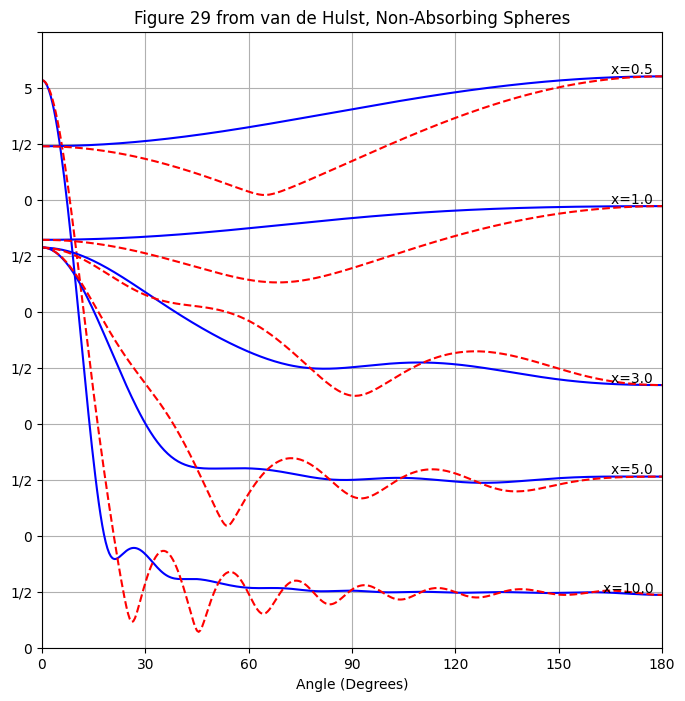

In [13]:
x = 5
m = 10000

theta = np.linspace(0, 180, 361)
mu = np.cos(theta * np.pi / 180)

fig, ax = plt.subplots(figsize=(8, 8))

x = 10
s1, s2 = mie.S1_S2(m, x, mu)
sone = 2.5 * abs(s1)
stwo = 2.5 * abs(s2)
plt.plot(theta, sone, "b")
plt.plot(theta, stwo, "--r")
plt.annotate("x=%.1f  " % x, xy=(theta[-1], sone[-1]), ha="right", va="bottom")

x = 5
s1, s2 = mie.S1_S2(m, x, mu)
sone = 2.5 * abs(s1) + 1
stwo = 2.5 * abs(s2) + 1
plt.plot(theta, sone, "b")
plt.plot(theta, stwo, "--r")
plt.annotate("x=%.1f  " % x, xy=(theta[-1], sone[-1]), ha="right", va="bottom")

x = 3
s1, s2 = mie.S1_S2(m, x, mu)
sone = 2.5 * abs(s1) + 2
stwo = 2.5 * abs(s2) + 2
plt.plot(theta, sone, "b")
plt.plot(theta, stwo, "--r")
plt.annotate("x=%.1f  " % x, xy=(theta[-1], sone[-1]), ha="right", va="bottom")

x = 1
s1, s2 = mie.S1_S2(m, x, mu)
sone = 2.5 * abs(s1) + 3
stwo = 2.5 * abs(s2) + 3
plt.plot(theta, sone, "b")
plt.plot(theta, stwo, "--r")
plt.annotate("x=%.1f  " % x, xy=(theta[-1], sone[-1]), ha="right", va="bottom")

x = 0.5
s1, s2 = mie.S1_S2(m, x, mu)
sone = 2.5 * abs(s1) + 4
stwo = 2.5 * abs(s2) + 4
plt.plot(theta, sone, "b")
plt.plot(theta, stwo, "--r")
plt.annotate("x=%.1f  " % x, xy=(theta[-1], sone[-1]), ha="right", va="bottom")

plt.xlim(0, 180)
plt.ylim(0, 5.5)
plt.xticks(range(0, 181, 30))
plt.yticks(np.arange(0, 5.51, 0.5))
plt.title("Figure 29 from van de Hulst, Non-Absorbing Spheres")
plt.xlabel("Angle (Degrees)")
ax.set_yticklabels(["0", "1/2", "0", "1/2", "0", "1/2", "0", "1/2", "0", "1/2", "5", " "])
plt.grid(True)
plt.show()

## Comparisons with Kerker, Angular Gain

Another interesting graph is figure 4.51 from [*The Scattering of Light* by Kerker](https://www.sciencedirect.com/book/9780124045507/the-scattering-of-light-and-other-electromagnetic-radiation).  

The angular gain is 
$$
G_1 = \frac{4}{x^2} |S_1(\theta)|^2 
\qquad\mbox{and}\qquad
G_2 = \frac{4}{x^2} |S_2(\theta)|^2 
$$

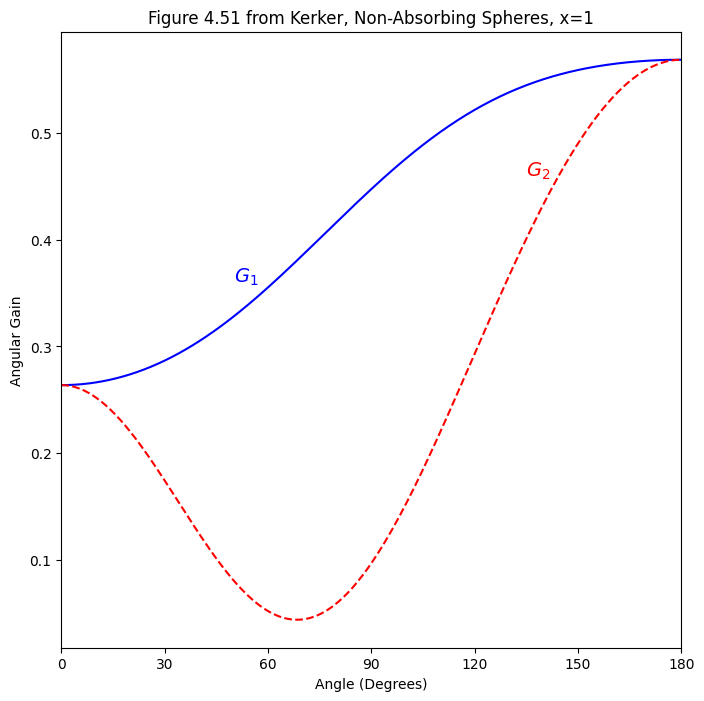

In [14]:
## Kerker, Angular Gain

x = 1
m = 10000

theta = np.linspace(0, 180, 361)
mu = np.cos(theta * np.pi / 180)

fig, ax = plt.subplots(figsize=(8, 8))

s1, s2 = mie.S1_S2(m, x, mu)

G1 = 4 * abs(s1) ** 2 / x**2
G2 = 4 * abs(s2) ** 2 / x**2

plt.plot(theta, G1, "b")
plt.plot(theta, G2, "--r")
plt.annotate("$G_1$", xy=(50, 0.36), color="blue", fontsize=14)
plt.annotate("$G_2$", xy=(135, 0.46), color="red", fontsize=14)

plt.xlim(0, 180)
plt.xticks(range(0, 181, 30))
plt.title("Figure 4.51 from Kerker, Non-Absorbing Spheres, x=1")
plt.xlabel("Angle (Degrees)")
plt.ylabel("Angular Gain")
plt.show()